In [2]:
from pymongo import MongoClient
client = MongoClient('mongodb://mongo:27017/')
db = client['epidb']

In [13]:
# Extract World Bank Data
WDI_countries = db.WDI_countries
WDI_indicators = db.WDI_indicators
for indicator in WDI_indicators.find():
    print(indicator["code"],"\t\t" ,indicator["name"])

DT.DOD.MLAT.ZS 		 Multilateral debt (% of total external debt)
DT.DOD.MWBG.CD 		 IBRD loans and IDA credits (DOD, current US$)
SH.XPD.PUBL.ZS 		 Health expenditure, public (% of GDP)
EG.ELC.PETR.ZS 		 Electricity production from oil sources (% of total)
NE.GDI.TOTL.CN 		 Gross capital formation (current LCU)
SG.GEN.LSOM.ZS 		 Female legislators, senior officials and managers (% of total)
SH.VAC.TTNS.ZS 		 Newborns protected against tetanus (%)
TX.VAL.SERV.CD.WT 		 Commercial service exports (current US$)
NE.GDI.TOTL.CD 		 Gross capital formation (current US$)
SL.TLF.0714.SW.FE.ZS 		 Children in employment, study and work, female (% of female children in employment, ages 7-14)
ER.GDP.FWTL.M3.KD 		 Water productivity, total (constant 2005 US$ GDP per cubic meter of total freshwater withdrawal)
SL.SLF.0714.ZS 		 Children in employment, self-employed (% of children in employment, ages 7-14)
EP.PMP.SGAS.CD 		 Pump price for gasoline (US$ per liter)
DT.INT.MIDA.CD 		 PPG, IDA (INT, current U

In [2]:
# Extract flight data
flight_data = db.flight_data
# Example to show one entry in the DB
flight_data.find_one()

{'_id': ObjectId('57b94398c1d8ef00fbf32ddf'),
 'city-destiny': 'copenhagen',
 'city-origin': 'aalborg',
 'country-destiny': 'DNK',
 'country-origin': 'DNK',
 'freight-revenue-traffic_tonnes': 8.4,
 'mail-revenue-traffic_tonnes': 0.6,
 'nb-air-carriers': 1,
 'passenger-revenue-traffic': 56159,
 'quarter': 'Q4',
 'year': 2002}

In [3]:
# Extract ECDC data
ECDC = db.ECDC
# Example to show one entry in the DB
ECDC.find_one()

{'%I': '0%',
 '%R': '12%',
 '%S': '88%',
 'Antibiotic Group': 'MRSA',
 'Country': 'Austria',
 'I': '0',
 'Pathogen': 'Staphylococcus aureus',
 'R': '55',
 'S': '400',
 'TotalN': '455',
 'Year': '2002',
 '_id': ObjectId('57b9eebac649941a42eea0eb'),
 'id': 'AUT'}

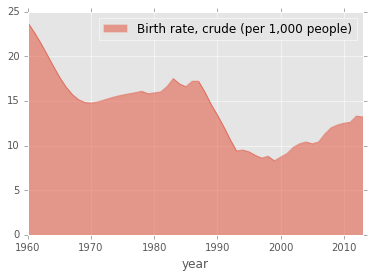

In [6]:
# Example using PANDAS to plot data\n",
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline
data = []
# Birth rate in Spain
data = list(db.WDI_countries.find({"country-id":"RUS", "attr": "SP.DYN.CBRT.IN"}))
for i in data:
    i['year'] = int(i['year'])
    i['value'] = float(i['value'])
df =  pd.DataFrame(data, columns=['year','value'])
df
# ts = df.cumsum()

df.plot.area(x='year', y='value', stacked=False, label='Birth rate, crude (per 1,000 people)')
# df.groupby(\"attr-\").size()\n",
# # print(df)"